# Kemper et al. (2008) :  Sacrum Inferior-Superior Loading


- Performed by: Yash Niranjan Poojary
- Reviewed by:
- Last modified : 2nd January 2024
- SAFER HBM Version: ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `mpp d R12.2.1 `

## Experiment by Kemper et al. (2008)
### Summary:

The simulated outputs are compared to the references from PMHS tests reported by Kemper et al.  <sup>[1]</sup>
1. Kemper, Andrew R., Craig McNally, and Stefan M. Duma. "Dynamic compressive response of the human pelvis axial loading of the sacroiliac joint." Biomedical sciences instrumentation 44 (2008): 171-176.


<!-- ![](../_env/setup_kemper_pelvis_11.0.png)  -->
```{figure} ../_env/setup_kemper_pelvis_11.0.png
---
align: center
---
Setup 
```


### Information on the subjects/specimens
| **Pelvis Number** | **Sex** | **Age [years]** | **Body weight [kg]** |
|:-----------------:|:-------:|:----------------:|:--------------------:|
|         1         |   Male  |        42        |         85.9         |
|         2         |  Female |        69        |         50.9         |
|         3         |   Male  |        72        |         75.9         |
|         4         |   Male  |        65        |         76.8         |
|         5         |   Male  |        45        |         52.9         |
|         6         |   Male  |        66        |         66.2         |

### Loading and Boundary Conditions
- Tests on six whole pelves, 5 male and 1 female, were obtained from fresh frozen human cadavers
### Boundary Conditions
> **Setup**
> - ***Load case***                     : oblique lateral throx impact
> - ***Potting Cups***                  : 
>   * `MAT_PIECEWISE_LINEAR_PLASTICITY` solids with $E=12.7Gpa$, $density=0.94 g/cm^3$ and $pr=0.3$ modelled according to Kim et al. (2006)
>   * The bonding compound did not cover the ligamentous tissue of the sacroiliac joint
>   * `MAT_RIGID` cup of shell elements and aluminium material properties enclosing the solid potting.
>   * The left and right ischium were placed in a thin layer of bonding compound in the bottom
> ```{admonition} Specimen setup andPositioning
>:class: important 
>
>  * Each pelvis was oriented and fixed so that the angle of the sacrum was approximately 25°
>  * All the soft tissue except sacrum-ilium ligaments removed.
>```
> **Constraints and Loading** 
> - ***Loads***            : 
>   * `*BOUNDARY_PRESCRIBED_MOTION_RIGID` define constant displacement rate of top potting cup in the inferior superior direction at the rate $2mm/ms$.
> - ***Constraint***            : 
>   * `*CONSTRAINED_SHELL_IN_SOLID_PENALTY` to define the potting.
>   * `*BOUNDARY_PRESCRIBED_MOTION_RIGID` to fix the bottom potting support in all DOFs.
>   * `*BOUNDARY_PRESCRIBED_MOTION_RIGID` to fix the top potting in all directions other than the loaded direction.

### Responses recorded
- Reaction force at the bottom support
- Rigid impactor displacement

The reference values from the paper were digitalised and are incuded in the notebook. The data corresponds to the unnormalised corridors.

### Other references
2.	Drevon D, Fursa SR, Malcolm AL. Intercoder reliability and validity of WebPlotDigitizer in extracting graphed data. Behavior modification. 2017;41(2):323-39. 
3.	Brynskog E, Iraeus J, Pipkorn B, Davidsson J. [Population variance in pelvic response to lateral impacts-a global sensitivity analysis](http://www.ircobi.org/wordpress/downloads/irc22/pdf-files/2234.pdf). Porto, Portugal: International Research Council on the Biomechanics of Injury IRCOBI[Google Scholar]. 2022.

In [1]:
import os
import glob
# for data analysis
import pandas as pd

In [2]:
 # Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
s11 = {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":2}
pmhs = {"linestyle" :'--', "color" : 'k',"alpha" :0.7,"linewidth":1}
pmhsM = {"linestyle" :'--', "color" : 'b',"alpha" :0.7,"linewidth":1}
pmhsF = {"linestyle" :'--', "color" : 'r',"alpha" : 0.7,"linewidth":1}
Test_avg = {"linestyle" :'-', "color" : 'r',"alpha" :1,"linewidth":1}
Test_std = {"linestyle" :'--', "color" : 'r',"alpha" :0.7,"linewidth":1}
test_corr = {"color": 'r',"alpha" : 0.2,'linewidth':0.0}

In [3]:
Tests=['dynamic_compression']
figures_dir = "../data/processed/SAFER_11.0/figures/"
processed_data_dir = f"../data/processed/SAFER_11.0"
experiment_dir= "../data/experiment_data/"
binout_path_sim={}
result_output_dir={}

if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)

for test in Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])

## Postprocessing with dynasaur

In [4]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [5]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/00_ids.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/01_calculation.def","../../model/SAFER_11.0/postprocessing/01_energy_calculation.def"]

In [6]:
sim_output={}
for test in Tests:
    sim_50F = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim_50F.get_defined_calculation_procedures()
    print(commands)
    for command in sim_50F.get_defined_calculation_procedures():
        sim_50F.calculate(command)
    sim_50F.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")
    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/01_calculation.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/00_ids.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read rbdout data ...
[READ BINOUT]	done reading rbdout!
[READ BINOUT]	read bndout data ...
[READ BINOUT]	done reading bndout!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[{'visualization': 'impactor_impactor_displacement', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'Model_reaction_force', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'Model_reaction_moment', 'x_label': 'time', 'y_label': 'moment'}, {'visualization': 'MODEL_Added_Mass', 'x_label': 'time', 'y_label': 'mass'}, {'visualization': 'MODEL_Total_Energy', 'x_label': 'time', 'y_label': 'energy'}, {'visualization': 'MODEL_Internal_Energy', 'x_label': 'time', 'y_label': 'energy'}, {'visualization': 'MODEL_Kinetic_Energy', 'x_la

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Model_reaction_moment
[DATA]	read id 21 from channel name: xmoment
[DATA]	read id 21 from channel name: ymoment
[DATA]	read id 21 from channel name: zmoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0\dynamic_compression
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0\dynamic_compression\D

In [7]:
# Import experimental data
force=pd.read_csv(os.path.join(experiment_dir,'data.csv'),delimiter=';',header=[0])
moment=pd.read_csv(os.path.join(experiment_dir,'data_moment.csv'),delimiter=';',header=[0])


### Force vs Displacement

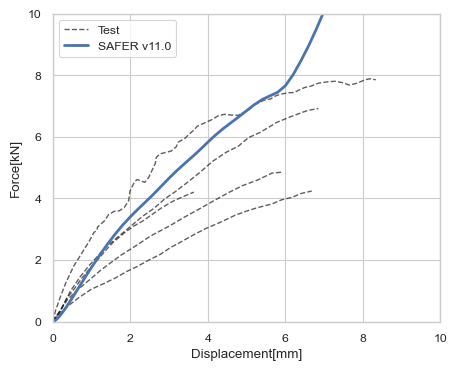

In [8]:
plt.figure(figsize=(5,4))
plt.plot(force.D1,force.F1/1000,**pmhs,label='Test')
plt.plot(force.loc[:,'D2':'D5':2],force.loc[:,'F2':'F5':2]/1000,**pmhs)
plt.plot(pd.DataFrame(sim_output[Tests[0]].impactor.impactor_displacement.displacement)*-1 ,pd.DataFrame(sim_output[Tests[0]].Model.reaction_force.force),label='SAFER v11.0',**s11)
plt.legend();
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.2)
plt.ylabel('Force[kN]');
plt.xlabel('Displacement[mm]');
plt.xlim([0,10]);
plt.ylim([0,10]);

### Moment vs Displacement
- the position of the loadcell to measure moment is assumed to be at the base

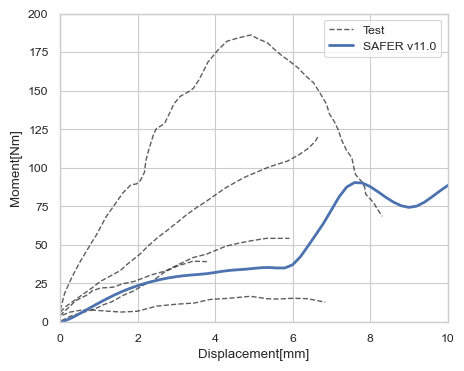

In [9]:
plt.figure(figsize=(5,4))
plt.plot(moment.D1,moment.M1,**pmhs,label='Test')
plt.plot(moment.loc[:,'D2':'D5':2],moment.loc[:,'M2':'M5':2],**pmhs)
plt.plot(pd.DataFrame(sim_output[Tests[0]].impactor.impactor_displacement.displacement)*-1 ,pd.DataFrame(sim_output[Tests[0]].Model.reaction_moment.moment),label='SAFER v11.0',**s11)
plt.legend();
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.2)
plt.ylabel('Moment[Nm]');
plt.xlabel('Displacement[mm]');
plt.xlim([0,10]);
plt.ylim([0,200]);

### Energy plots

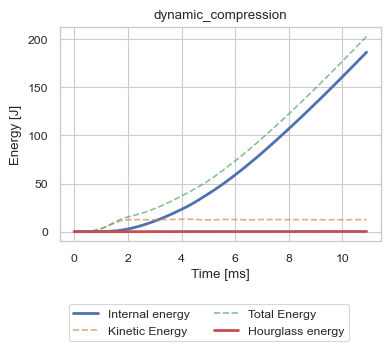

In [14]:
fig_eny, ax = plt.subplots(nrows=1, ncols=1,figsize=(4,3))

ax.plot(sim_output['dynamic_compression'].MODEL.Internal_Energy.time,sim_output['dynamic_compression'].MODEL.Internal_Energy.energy,linewidth=2)
ax.plot(sim_output['dynamic_compression'].MODEL.Kinetic_Energy.time,sim_output['dynamic_compression'].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
ax.plot(sim_output['dynamic_compression'].MODEL.Total_Energy.time,sim_output['dynamic_compression'].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
ax.plot(sim_output['dynamic_compression'].MODEL.Hourglass_Energy.time,sim_output['dynamic_compression'].MODEL.Hourglass_Energy.energy,linewidth=2)
ax.set(title="{}".format('dynamic_compression'),xlabel='Time [ms]',ylabel='Energy [J]')


fig_eny.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.9,-0.01),ncol=2);
fig_eny.tight_layout()